# Clockwork Axion

## Parameterspace from Paper

Text(0, 0.5, 'mR')

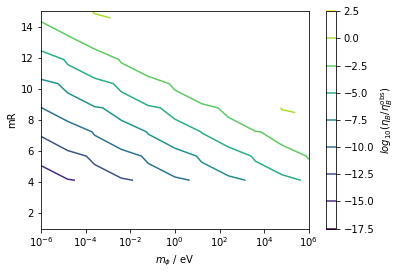

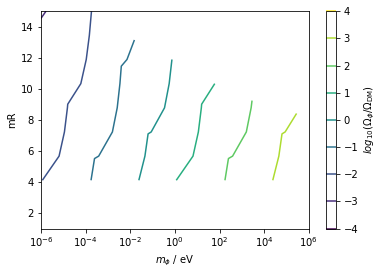

In [5]:
eta = obs[:, :, 0] * obs[:, :, 1]
Omega_h_sq = obs[:, :, 2] 
plt.figure()
plt.contour(m_phi_range * 1e9, mR_range, np.log10(eta / eta_B_observed))
plt.xscale("log")
plt.colorbar(label=r"$log_{10}(\eta_B / \eta_B^\mathrm{obs})$")
plt.xlabel(r"$m_\phi$ / eV")
plt.ylabel(r"mR")
plt.figure()
plt.contour(m_phi_range * 1e9, mR_range, np.log10(Omega_h_sq / Omega_DM_h_sq))
plt.xscale("log")
plt.colorbar(label=r"$log_{10}(\Omega_\phi / \Omega_\mathrm{DM})$")
plt.xlabel(r"$m_\phi$ / eV")
plt.ylabel(r"mR")

Text(0, 0.5, 'mR')

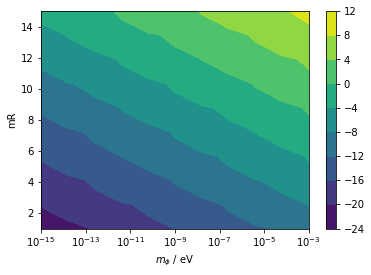

In [16]:
curvature = np.array([[calc_d2V_eff_dphi2(theta_to_phi_over_f(1.0, calc_eps(mR)), calc_eps(mR), m_phi / calc_eps(mR))
            for m_phi in m_phi_range] for mR in mR_range])
plt.contourf(m_phi_range * 1e9, mR_range, np.log10(np.sqrt(curvature) / H_inf) )
plt.xscale("log")
plt.colorbar()
plt.xlabel(r"$m_\phi$ / eV")
plt.ylabel(r"mR")

Text(0.5, 0, 'mR')

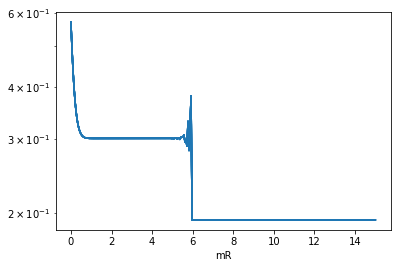

In [29]:
for m_phi in m_phi_range:
    mRs = np.linspace(0, 15, 300)
    A = np.array([calc_d2V_eff_dphi2(theta_to_phi_over_f(1.0, calc_eps(mR)), calc_eps(mR), m_phi / calc_eps(mR))
                   / (m_phi / calc_eps(mR))**2 for mR in mRs])
    plt.plot(mRs, A, color="tab:blue")
plt.yscale("log")
plt.xlabel(r"mR")

## Plot of the effective Potential

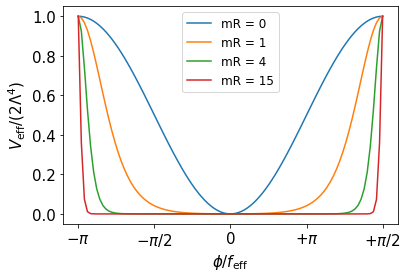

In [5]:
Gamma_phi = 1e7
H_inf = 2e10
mR = 6
m_phi = 100 * 1e-9 # [GeV]
eps = calc_eps(mR)
f = 1e12
f_eff = calc_f_eff(f, eps)
M = m_phi / eps 
alpha_range = np.linspace(-np.pi, np.pi, 100)
for plot_mR in [0, 1, 4, 15]:
    eps = calc_eps(plot_mR)
    phi_over_f_range = calc_f_eff(f, eps) * alpha_range / f # not a linear map
    Lambda = np.sqrt(M * f)
    y = calc_V_eff_over_f_sq(phi_over_f_range, eps, M) * f**2 / (2*Lambda**4)
    y[0] = 1; y[-1] = 1 # okay this is bad
    plt.plot(alpha_range, y, label=f"mR = {plot_mR}")
plt.xlabel(r"$\phi / f_\mathrm{eff}$", fontsize=15)
plt.ylabel(r"$V_\mathrm{eff} / (2 \Lambda^4)$", fontsize=15)
plt.legend(fontsize=12)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r"$-\pi$", r"$-\pi/2$", "0", r"$+\pi/2$", r"$+\pi$",], fontsize=15)
plt.yticks(fontsize=15);

## Example Evolution

step = 1
calculcated initial integration time:
tmax_inf_time = 36.93551012003315 tmax_axion_time = 3.6935510120033156e-14
rh: 0.24242711067199707
axion: 0.006184577941894531
transport eq.: 0.23056912422180176
B-L range: -5.394523789005145e-41 0.0
delta = 4.089465179349102 rtol_asym = 0.001
step = 2
rh: 0.1023566722869873
axion: 0.34272003173828125
transport eq.: 1.3460006713867188
B-L range: -2.3654746879464492e-21 -5.394523789005141e-41
delta = 14.301657259633428 rtol_asym = 0.001
step = 3
rh: 0.00011134147644042969
axion: 0.08912229537963867
transport eq.: 1.3012051582336426
B-L range: -2.2217315003778924e-21 -2.182178982916872e-21
delta = 0.01797431261471428 rtol_asym = 0.001
step = 4
rh: 0.00010752677917480469
axion: 0.07976603507995605
transport eq.: 1.572765588760376
B-L range: -2.2119506364728324e-21 -2.1981934675046165e-21
delta = 0.006241746594461395 rtol_asym = 0.001
step = 5
rh: 0.00012922286987304688
axion: 0.09020018577575684
transport eq.: 1.7463457584381104
B-L range: -2

(1.922333779004356e-23, 1.0, 3.24521989323041, 1.0)

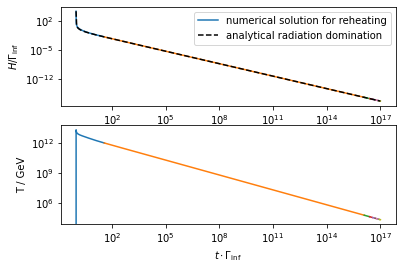

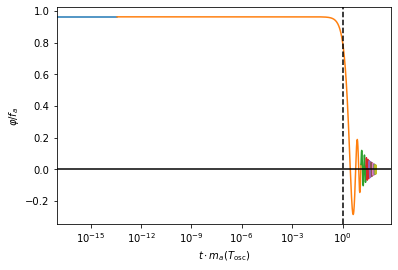

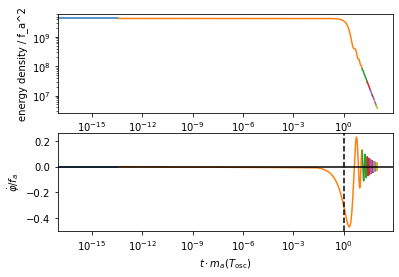

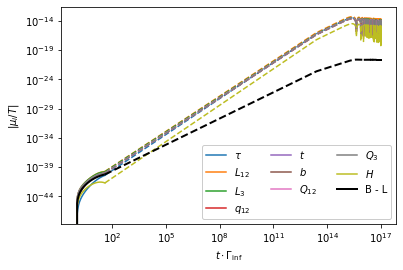

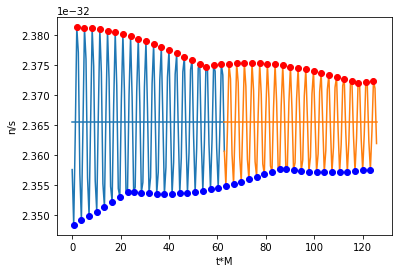

In [1]:
%run observables.py
%run clockwork_axion.py
H_inf = 2e12
Gamma_inf = 1e8
mR = 0
m_phi = 100 * 1e-9 # [GeV]
eps = calc_eps(mR)
f = 1e12
f_eff = calc_f_eff(f, eps)
M = m_phi / eps 
compute_observables(H_inf, Gamma_inf, (eps, M), f, clockwork_axion_field, (theta_to_phi_over_f(1.0, eps), 0.0), 
                    calc_init_time=True, debug=True)